In [586]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [587]:
from tqdm.notebook import tqdm
import torch

In [588]:
train_df = pd.read_csv("twitter_training.csv",header=None)
test_df = pd.read_csv('twitter_validation.csv', header=None)

train_df.drop(0,axis=1,inplace=True)
test_df.drop(0,axis=1,inplace=True)

In [589]:
train_df.shape

(74682, 3)

In [590]:
txt_emoji = [
    ':)', ':P', ':D', ':|', ":'(", ':O', ":*", '<3', ':(', ';)',
    'xD', ':/', '=D'
]
txt_emoji_pic =[
    '😊', '😛', '😄', '😐', '😢', '😲', '😘', '😍', '😧', '😉', 
    '😁', '😒', '😀'
]

In [591]:
add_emoji_txt = ['sad', 'unhappy', 'crying', 'smile', 'happy', 'love',"enjoy","shock","proud","cool","angry","kill","murder","tired","exhausted","sleep","sleepy","asleep","scared","scary","afraid","confuse","confused"]
add_emoji_pic =['😔', '😧','😭', '😆',  '😊', '😍','😄','😐','😤','😉','😡','😡','😡','😫','😫','😪','😪','😪','😰','😰','😰','😕','😕']

In [592]:
def emoji_conv(txt, conv_txt, conv_pic):
    temp = []
    for i in txt:
        for j in range(len(conv_txt)):
            if i == conv_txt[j]:
                i = conv_pic[j]
        temp.append(i)
    return ' '.join(temp)
    

In [593]:
def conv_emoticon_on_data(df_data):
    conv_text = []
    for idx, row in df_data.iterrows():
        txt = [i for i in row['post'].split()]
        emoji_found = emoji_conv(txt, txt_emoji, txt_emoji_pic)
        conv_text.append(emoji_found)
    return conv_text

In [594]:
def add_emoji_text_data(df_data):
    reform_pos_text = []
    for ct in df_data:
        txt = [i for i in ct.split()]
        emoji_found = emoji_conv(txt, add_emoji_txt, add_emoji_pic)
        reform_pos_text.append(emoji_found)
    return reform_pos_text

In [595]:
def new_df_emoji_tweet(data, polarity):
    temp = pd.DataFrame(columns=['sentiment', 'post'])
    temp['post'] = data
    temp['sentiment'] = polarity
    return temp

In [596]:
train_df.columns = ['platform','sentiment','post']
test_df.columns = ['platform','sentiment','post']

df = pd.concat([train_df,test_df], axis=0)

In [597]:
df

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [598]:
def isfloat(x):
    if(type(x) == float ):
        return False
    else:
        return True
df = df[df["post"].apply(isfloat)]


In [599]:

df.sentiment = df.sentiment.map({"Neutral":0, "Irrelevant":0 ,"Positive":1,"Negative":-1})

C:\Users\abhji\AppData\Local\Temp\ipykernel_20940\4275400694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment = df.sentiment.map({"Neutral":0, "Irrelevant":0 ,"Positive":1,"Negative":-1})


In [600]:
df

,platform,sentiment,post
0,Borderlands,1,im getting on borderlands and i will murder yo...
1,Borderlands,1,I am coming to the borders and I will kill you...
2,Borderlands,1,im getting on borderlands and i will kill you ...
3,Borderlands,1,im coming on borderlands and i will murder you...
4,Borderlands,1,im getting on borderlands 2 and i will murder ...
...,...,...,...
995,GrandTheftAuto(GTA),0,⭐️ Toronto is the arts and culture capital of ...
996,CS-GO,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Borderlands,1,Today sucked so it’s time to drink wine n play...
998,Microsoft,1,Bought a fraction of Microsoft today. Small wins.


In [601]:
Df1 = df[df["sentiment"] == 1]
Df2 = df[df["sentiment"] == -1]
Df3 = df[df["sentiment"] == 0]

In [602]:
df1 = conv_emoticon_on_data(Df1)
df1 = add_emoji_text_data(df1)

df2 = conv_emoticon_on_data(Df2)
df2 = add_emoji_text_data(df2)

df3 = conv_emoticon_on_data(Df3)
df3 = add_emoji_text_data(df3)

In [603]:
df1 = new_df_emoji_tweet(df1,1)
df2 = new_df_emoji_tweet(df2,-1)
df3 = new_df_emoji_tweet(df3,0)
dfn = pd.concat([df1,df2,df3],axis = 0)

In [604]:
dfn[dfn["sentiment"] == -1]

,sentiment,post
0,-1,the biggest dissappoinment in my life came out...
1,-1,The biggest disappointment of my life came a y...
2,-1,The biggest disappointment of my life came a y...
3,-1,the biggest dissappoinment in my life coming o...
4,-1,For the biggest male dissappoinment in my life...
...,...,...
22619,-1,@Rainbow6Game when will you ban mnk/cronos pla...
22620,-1,Removing mcree’s noose because ur pussies enit...
22621,-1,wtf
22622,-1,I have noticed streamers I watch who are now p...


<h2>LSTM and naive bayes MODELs

In [605]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [606]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming you have labeled data in 'X' and 'y' where 'X' contains text data and 'y' contains sentiment labels (e.g., 0 for negative, 1 for neutral, 2 for positive)
from sklearn.preprocessing import LabelEncoder


<h3>WITHOUT EMOJI

In [607]:
X = df['post']
y = df["sentiment"]

In [608]:
classss = set(y)
print(classss)

{0, 1, -1}


NAIVE BAYES CLASSIFIER

In [609]:

# Assuming you have labeled data in 'X' and 'y' where 'X' contains text data and 'y' contains sentiment labels (0 for negative, 1 for neutral, 2 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy}")


Multinomial Naive Bayes Accuracy: 0.7758666666666667


LSTM

In [610]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=10000)  # You can adjust the vocabulary size
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)  # You can adjust the sequence length

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 4 output classes for negative, neutral,irrelevant and positive

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy}")


Epoch 1/5
938/938 [==============================] - 56s 57ms/step - loss: 0.7149 - accuracy: 0.6846 - val_loss: 0.5591 - val_accuracy: 0.7663
Epoch 2/5
938/938 [==============================] - 70s 74ms/step - loss: 0.4343 - accuracy: 0.8254 - val_loss: 0.4381 - val_accuracy: 0.8259
Epoch 3/5
938/938 [==============================] - 70s 75ms/step - loss: 0.3138 - accuracy: 0.8764 - val_loss: 0.4180 - val_accuracy: 0.8423
Epoch 4/5
938/938 [==============================] - 80s 86ms/step - loss: 0.2500 - accuracy: 0.9021 - val_loss: 0.4103 - val_accuracy: 0.8531
Epoch 5/5
469/469 [==============================] - 10s 20ms/step - loss: 0.3912 - accuracy: 0.8615
LSTM Accuracy: 0.8615333437919617


In [611]:
loss

0.39124029874801636

In [612]:
accuracy

0.8615333437919617

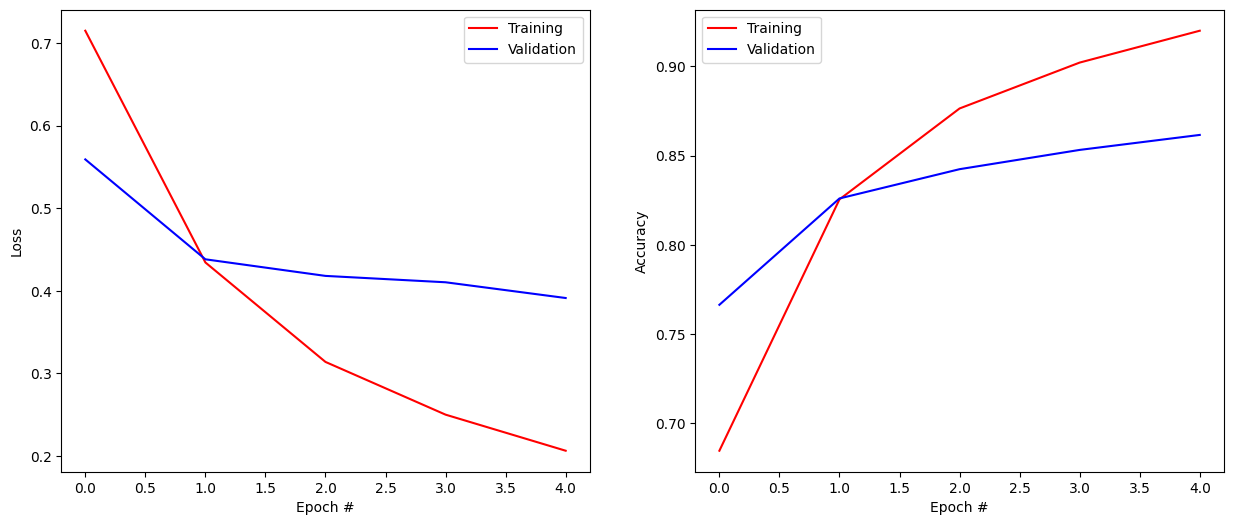

In [613]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h3>WITH EMOJI

In [614]:
dfn["anger"] = 0
dfn["anticipation"] = 0
dfn["disgust"] = 0
dfn["fear"] = 0
dfn["joy"] = 0
dfn["sadness"] = 0
dfn["surprise"] = 0
dfn["trust"] = 0

In [615]:
emoji = pd.read_csv("EmoTag1200-scores.csv")

In [671]:
emoji

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1F308,🌈,rainbow,0.00,0.28,0.00,0.00,0.69,0.06,0.22,0.33
1,1F319,🌙,crescent moon,0.00,0.31,0.00,0.00,0.25,0.00,0.06,0.25
2,1F31A,🌚,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
3,1F31E,🌞,sun with face,0.00,0.22,0.00,0.00,0.78,0.00,0.11,0.22
4,1F31F,🌟,glowing star,0.00,0.28,0.00,0.00,0.53,0.00,0.25,0.31
...,...,...,...,...,...,...,...,...,...,...,...
145,2757,❗,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11
146,2764,❤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67
147,27A1,➡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22
148,2B05,⬅,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06


In [617]:
for i in range(dfn.shape[0]):
    for j in range(emoji.shape[0]):
        if emoji.iloc[j,1] in dfn.iloc[i,1]:
            dfn.iloc[i,2:] += emoji.iloc[j,3:]

In [618]:
X = dfn.iloc[:,1:]
y = dfn["sentiment"]

In [619]:
classss = set(y)
print(classss)

{0, 1, -1}


NIAVE BAYES CLASSIFIER

In [620]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_features = 5000  # You can adjust max_features based on your data
vectorizer = CountVectorizer(max_features=max_features, stop_words='english')  
X_train_text_transformed = vectorizer.fit_transform(X_train['post'])
X_test_text_transformed = vectorizer.transform(X_test['post'])

X_train_combined = np.concatenate([X_train_text_transformed.toarray(), X_train.iloc[:,1:]], axis=1)
X_test_combined = np.concatenate([X_test_text_transformed.toarray(), X_test.iloc[:,1:]], axis=1)


naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_combined, y_train)

y_pred = naive_bayes_model.predict(X_test_combined)


accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy}")


Multinomial Naive Bayes Accuracy: 0.6755333333333333


LSTM

In [621]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=10000)  # You can adjust the vocabulary size
tokenizer.fit_on_texts(X["post"])
X_sequences = tokenizer.texts_to_sequences(X["post"])
X_padded = pad_sequences(X_sequences, maxlen=100)  # You can adjust the sequence length
X_padded = np.concatenate([X_padded, X.iloc[:,1:]], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


# Create an LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim=10000, output_dim=64))
model1.add(LSTM(64))
model1.add(Dense(3, activation='softmax'))  # 4 output classes for negative, neutral,irrelevant and positive

# Compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model1.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy}")



Epoch 1/5
938/938 [==============================] - 59s 60ms/step - loss: 0.7577 - accuracy: 0.6596 - val_loss: 0.5700 - val_accuracy: 0.7685
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.4708 - accuracy: 0.8138 - val_loss: 0.4750 - val_accuracy: 0.8085
Epoch 3/5
938/938 [==============================] - 55s 58ms/step - loss: 0.3602 - accuracy: 0.8620 - val_loss: 0.4267 - val_accuracy: 0.8339
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.2925 - accuracy: 0.8882 - val_loss: 0.4033 - val_accuracy: 0.8459
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3849 - accuracy: 0.8587
LSTM Accuracy: 0.8587333559989929


In [622]:
loss

0.3848519027233124

In [623]:
accuracy

0.8587333559989929

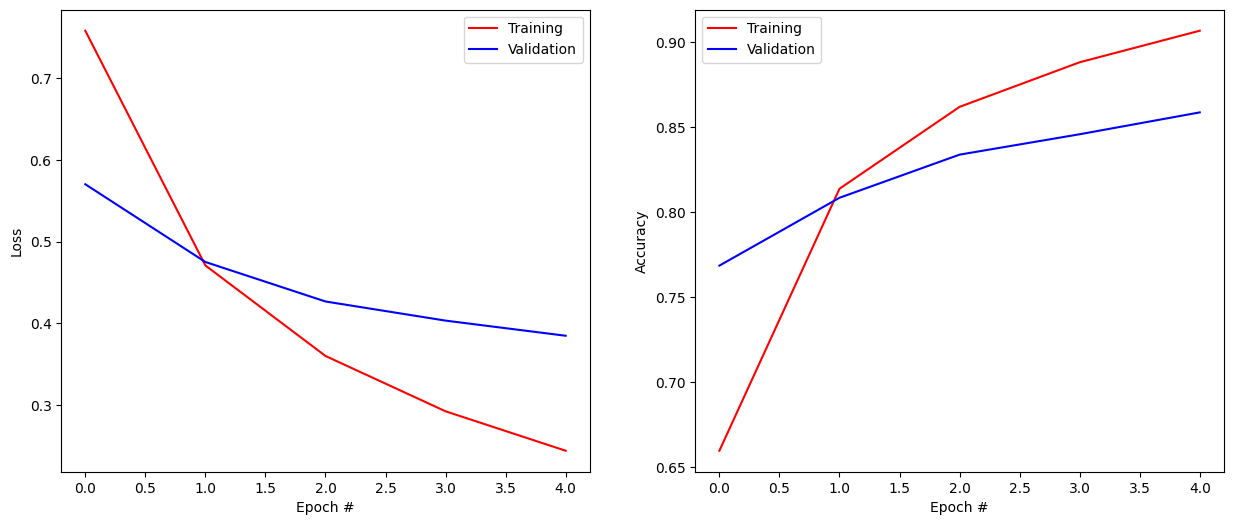

In [624]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

TRANSFORMERS

In [625]:
df = pd.read_csv("twitter_training.csv",header=None)
df.drop([0],inplace=True,axis =1)
df.columns =['platform','sentiment','post']

In [626]:
from transformers import pipeline
from transformers import AutoTokenizer,AutoModelForSequenceClassification


In [627]:
model_name='distilbert-base-uncased-finetuned-sst-2-english'

In [628]:
model=AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer1=AutoTokenizer.from_pretrained(model_name)

In [629]:
classifier=pipeline('sentiment-analysis', model=model, tokenizer=tokenizer1)

In [630]:
df.head()

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [631]:
results=classifier(list(df['post'][:35]))
results


[{'label': 'NEGATIVE', 'score': 0.9834704995155334},
 {'label': 'POSITIVE', 'score': 0.9932871460914612},
 {'label': 'POSITIVE', 'score': 0.9783738851547241},
 {'label': 'NEGATIVE', 'score': 0.9768756628036499},
 {'label': 'POSITIVE', 'score': 0.7018901705741882},
 {'label': 'NEGATIVE', 'score': 0.9805620312690735},
 {'label': 'NEGATIVE', 'score': 0.7845368981361389},
 {'label': 'NEGATIVE', 'score': 0.9357831478118896},
 {'label': 'POSITIVE', 'score': 0.9987744688987732},
 {'label': 'NEGATIVE', 'score': 0.937289834022522},
 {'label': 'NEGATIVE', 'score': 0.9648420810699463},
 {'label': 'POSITIVE', 'score': 0.7795966267585754},
 {'label': 'POSITIVE', 'score': 0.9972885847091675},
 {'label': 'POSITIVE', 'score': 0.9972885847091675},
 {'label': 'POSITIVE', 'score': 0.9980003237724304},
 {'label': 'POSITIVE', 'score': 0.998803973197937},
 {'label': 'POSITIVE', 'score': 0.9034878015518188},
 {'label': 'NEGATIVE', 'score': 0.9396255016326904},
 {'label': 'POSITIVE', 'score': 0.99944120645523

In [632]:
token=tokenizer1.tokenize(df['post'][0])

In [633]:
token_id=tokenizer1.convert_tokens_to_ids(token)

In [634]:
input_ids=tokenizer1(df['post'][0])

In [635]:
X_train=list(df['post'][:10])

In [636]:
batch=tokenizer1(X_train,padding=True,truncation=True,max_length=512,return_tensors='pt')


In [637]:
import torch
import torch.nn.functional as F


In [638]:
with torch.no_grad():
    outputs=model(**batch)
    print(outputs)
    predictions=F.softmax(outputs.logits, dim=1)
    print(predictions)
    labels=torch.argmax(predictions,dim=1)
    print(labels)
    labels=[model.config.id2label[label_id] for label_id in labels.tolist()]
    print(labels)


SequenceClassifierOutput(loss=None, logits=tensor([[ 2.2075, -1.8785],
        [-2.4459,  2.5511],
        [-1.8743,  1.9377],
        [ 2.0326, -1.7109],
        [-0.3719,  0.4844],
        [ 2.1153, -1.8056],
        [ 0.6950, -0.5973],
        [ 1.4526, -1.2266],
        [-3.2673,  3.4359],
        [ 1.4471, -1.2574]]), hidden_states=None, attentions=None)
tensor([[0.9835, 0.0165],
        [0.0067, 0.9933],
        [0.0216, 0.9784],
        [0.9769, 0.0231],
        [0.2981, 0.7019],
        [0.9806, 0.0194],
        [0.7845, 0.2155],
        [0.9358, 0.0642],
        [0.0012, 0.9988],
        [0.9373, 0.0627]])
tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0])
['NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE']


In [639]:
df['sentiment'][:10].tolist()


['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive']

In [640]:
df.head()

,platform,sentiment,post
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [641]:
import re

In [642]:
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z0-9\s]', '', str(text))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [643]:
df['Preprocessed Text'] = df['post'].apply(clean_text) 

In [644]:
X_train=list(df['Preprocessed Text'][:1000])

In [645]:
batch=tokenizer1(X_train,padding=True,truncation=True,max_length=512,return_tensors='pt')

In [646]:
with torch.no_grad():
    outputs=model(**batch)
    #print(outputs)
    predictions=F.softmax(outputs.logits, dim=1)
    #print(predictions)
    labels=torch.argmax(predictions,dim=1)
    #print(labels)
    labels=[model.config.id2label[label_id] for label_id in labels.tolist()]

In [647]:
new_df=df[:1000]

In [648]:
new_df['Label1'] = labels

C:\Users\abhji\AppData\Local\Temp\ipykernel_20940\3083980595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Label1'] = labels


In [649]:
new_df['sentiment'].value_counts()

sentiment
Positive      424
Neutral       282
Negative      192
Irrelevant    102
Name: count, dtype: int64

In [650]:
new_df['Label1'].value_counts()

Label1
NEGATIVE    526
POSITIVE    474
Name: count, dtype: int64

In [651]:
dfn.columns

Index(['sentiment', 'post', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust'],
      dtype='object')

In [675]:
acc_list = []
for result in results:
    acc_list.append(result["score"])
accuracy = np.mean(acc_list)
print("accuracy with emojis",accuracy)

accuracy with emojis 0.9659308297293526


In [676]:
new = []
for x in predictions:
    new.append(max(x))
accurac = sum(new)/len(new)
print("accuracy without emojis",accurac)

accuracy without emojis tensor(0.9731)


INPUT

In [652]:
inp = input()

In [653]:
xf = np.array([inp,0,0,0,0,0,0,0,0])

In [654]:
xf = pd.DataFrame(xf.reshape(1,9),columns=["post",'anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust'])

In [655]:
for i in range(1,xf.shape[1]):
    xf.iloc[0,i] = 0

In [656]:
def emojiconv(x):
    x = x.split(" ")
    for i in x:
        if i in txt_emoji:
            j = txt_emoji.index(i)
            l = x.index(i)
            x[l] = txt_emoji_pic[j]
        if i in add_emoji_txt:
            j = add_emoji_txt.index(i)
            l = x.index(i)
            x[l] = add_emoji_pic[j]
    return " ".join(x)

In [657]:
xf["posti"] = emojiconv(xf["post"][0])

In [658]:
xf["posti"][0]

'Im 😔 and depressed and dissapointed in life '

In [659]:
xf.iloc[0,1]

0

In [660]:
for j in range(emoji.shape[0]):
        if emoji.iloc[j,1] in xf["posti"][0]:
            xf.iloc[0,1:-1] += emoji.iloc[j,3:]


In [661]:
a = vectorizer.transform(xf['post'])

In [662]:
xf1 = np.concatenate([a.toarray(), xf.iloc[:,1:-1]], axis=1)

In [663]:
xf1

array([[0, 0, 0, ..., 0.72, 0.19, 0.14]], dtype=object)

In [664]:
pred = naive_bayes_model.predict(xf1)


In [665]:
pred

array([-1], dtype=int64)

In [666]:
X_sequences = tokenizer.texts_to_sequences(xf["posti"])
X_padded = pad_sequences(X_sequences, maxlen=100)  # You can adjust the sequence length
X_combined_numeric = np.concatenate([X_padded, xf.iloc[:,1:-1]], axis=1)

In [667]:
X_padded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  307,  552,    4, 5742,    4,    8,
         255]])

In [668]:
pred1 = model1.predict(X_padded)

1/1 [==============================] - 1s 622ms/step


In [669]:
pred1

array([[0.4312786 , 0.12702624, 0.44169524]], dtype=float32)

In [679]:
dict =  {0:"Neutral" ,1:"Positive",2:"Negative"}
print("INPUT TWEET : ",inp)
dict[np.argmax(pred1)]

INPUT TWEET :  Im sad and depressed and dissapointed in life 


'Negative'